In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Importing dataset

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv')
df1.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df1.shape

(1599, 12)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df1.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data visualization

In [ ]:
df1.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df1.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
ph,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Univariate analysis

<ipython-input-8-cd6e6139b35a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df1.chlorides)


<Axes: xlabel='chlorides', ylabel='Density'>

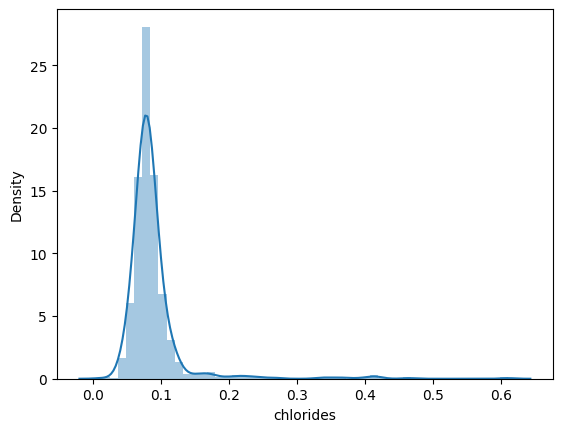

In [ ]:
sb.distplot(df1.chlorides)

Bivariate analysis

<Axes: xlabel='chlorides', ylabel='ph'>

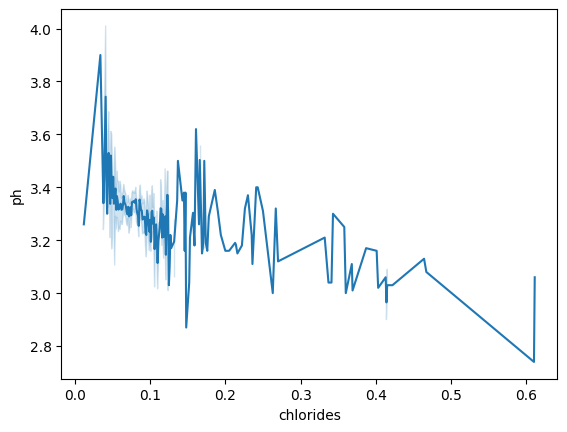

In [ ]:
sb.lineplot(x=df1.chlorides, y=df1.ph)

Multivariate analysis

<Figure size 5000x5000 with 0 Axes>

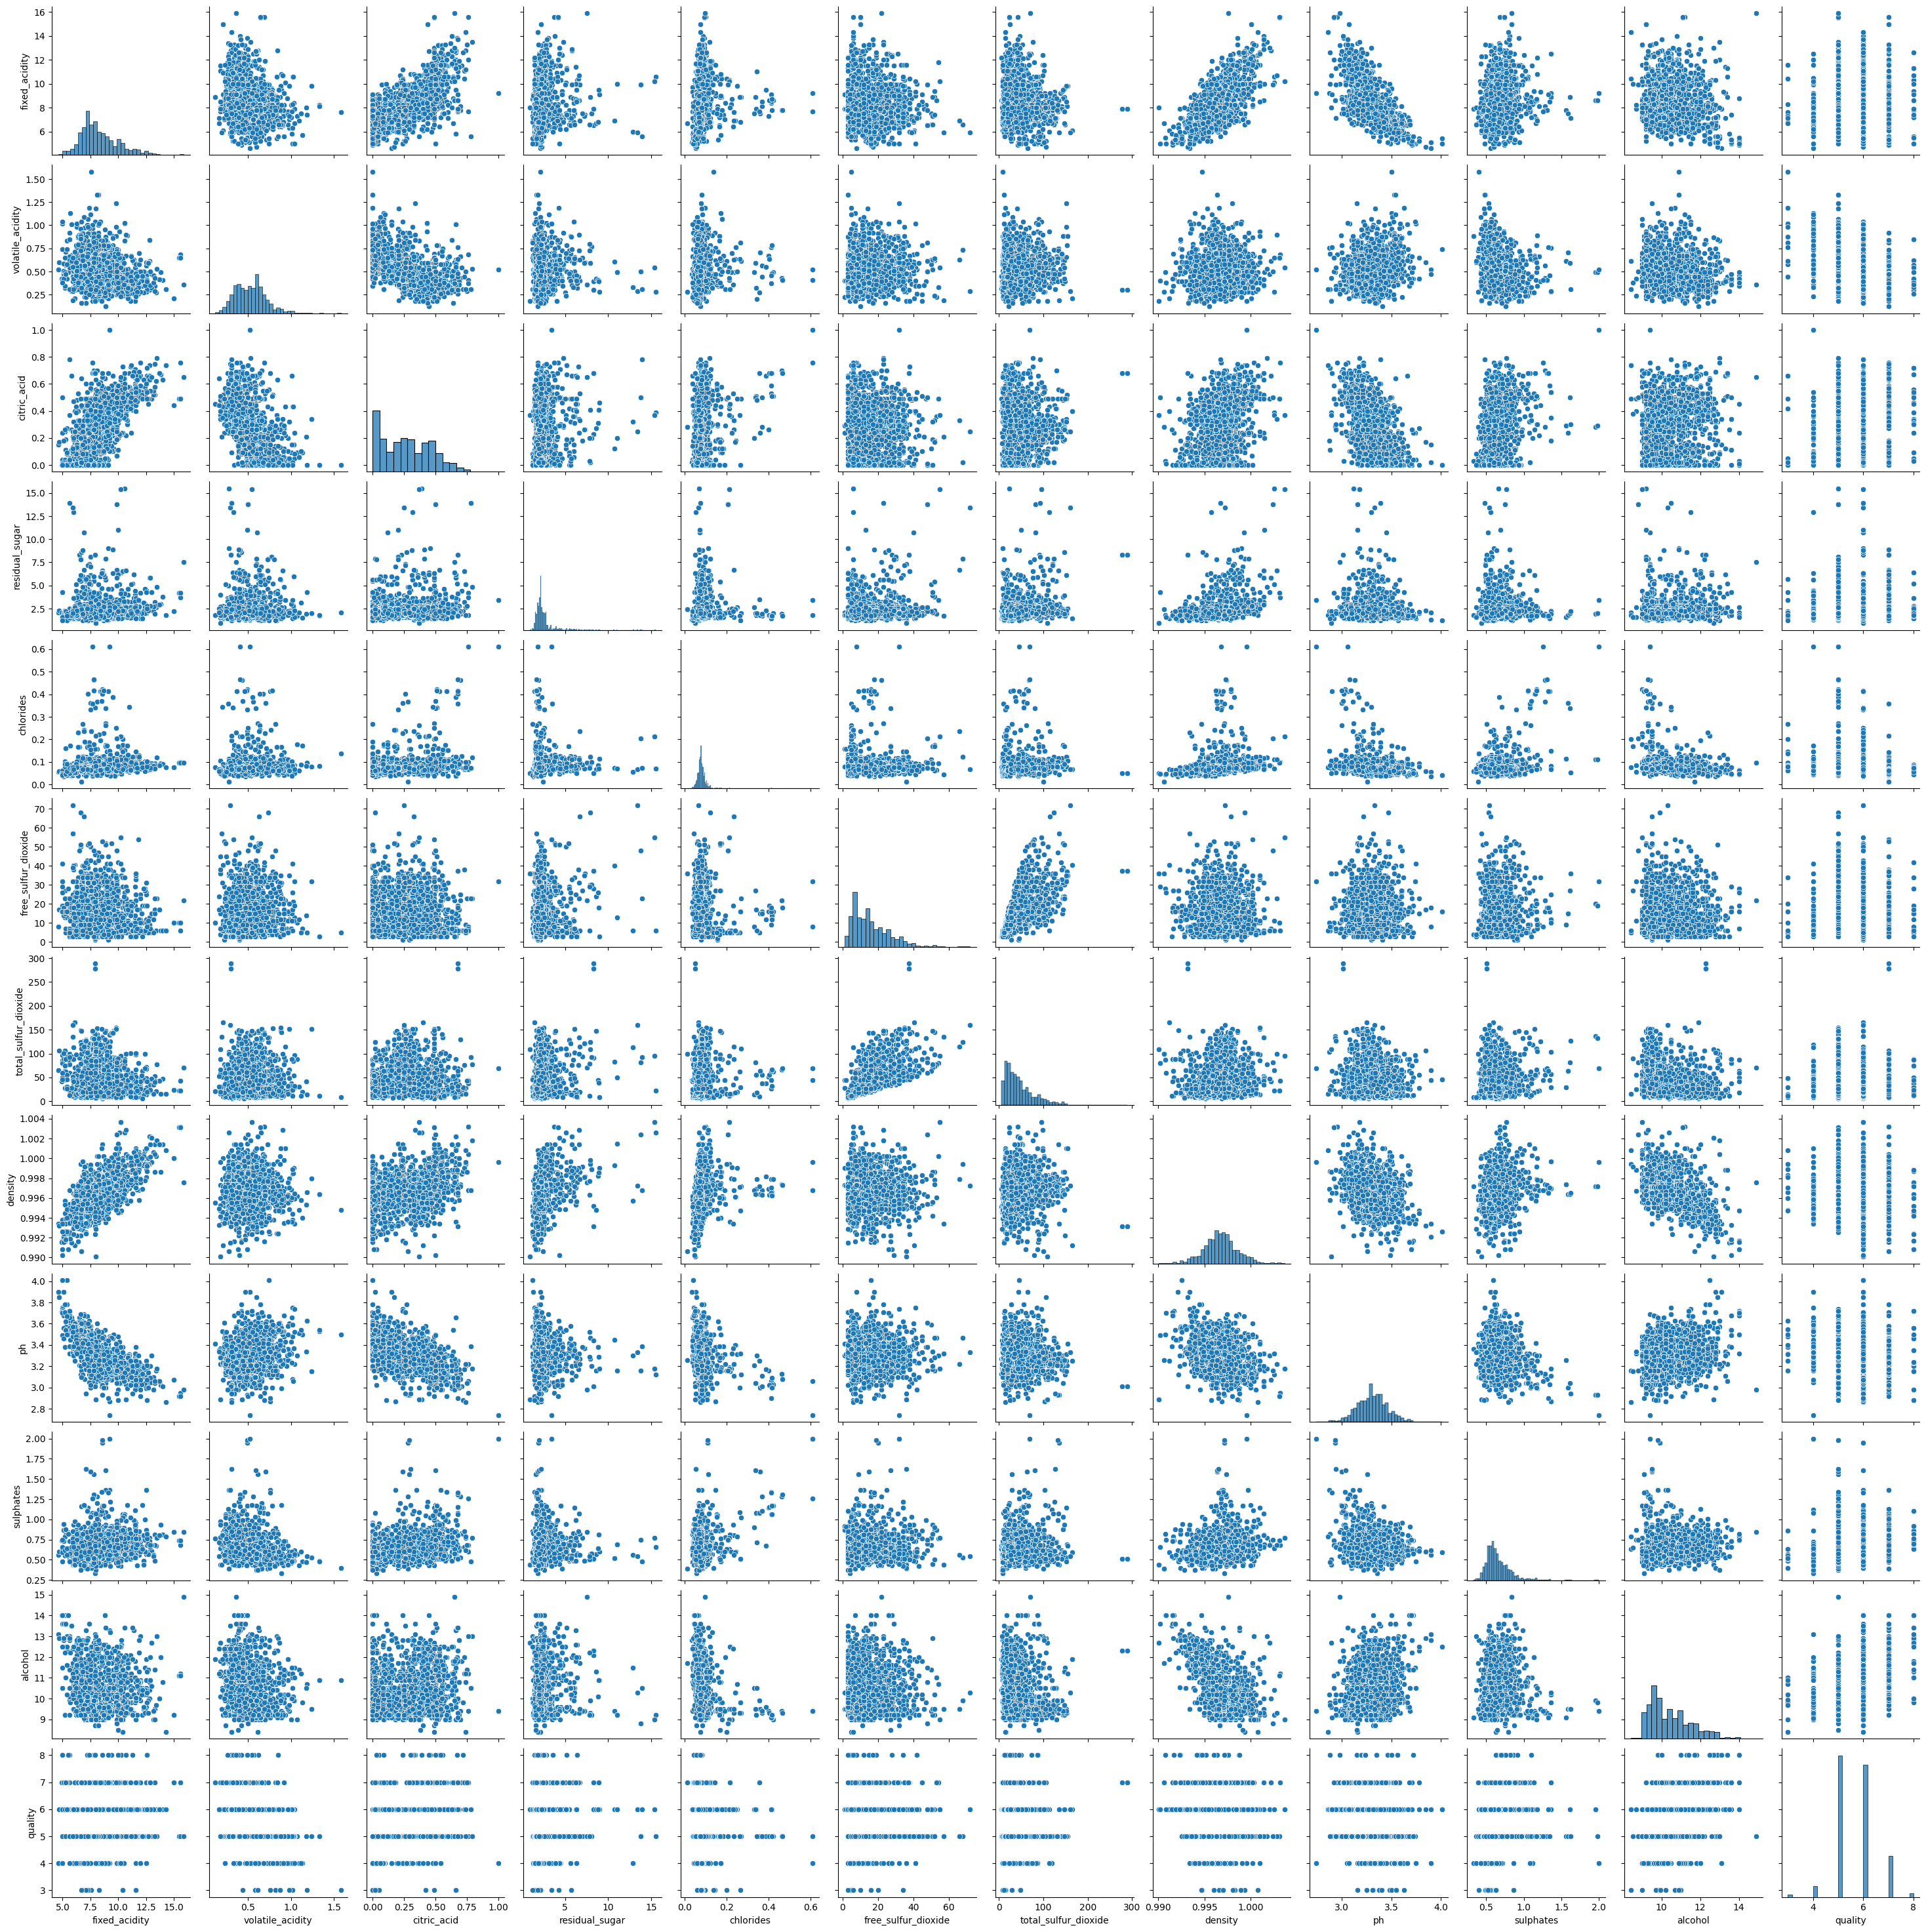

In [ ]:
plt.figure(figsize=(50,50))
sb.pairplot(df1)

<Axes: >

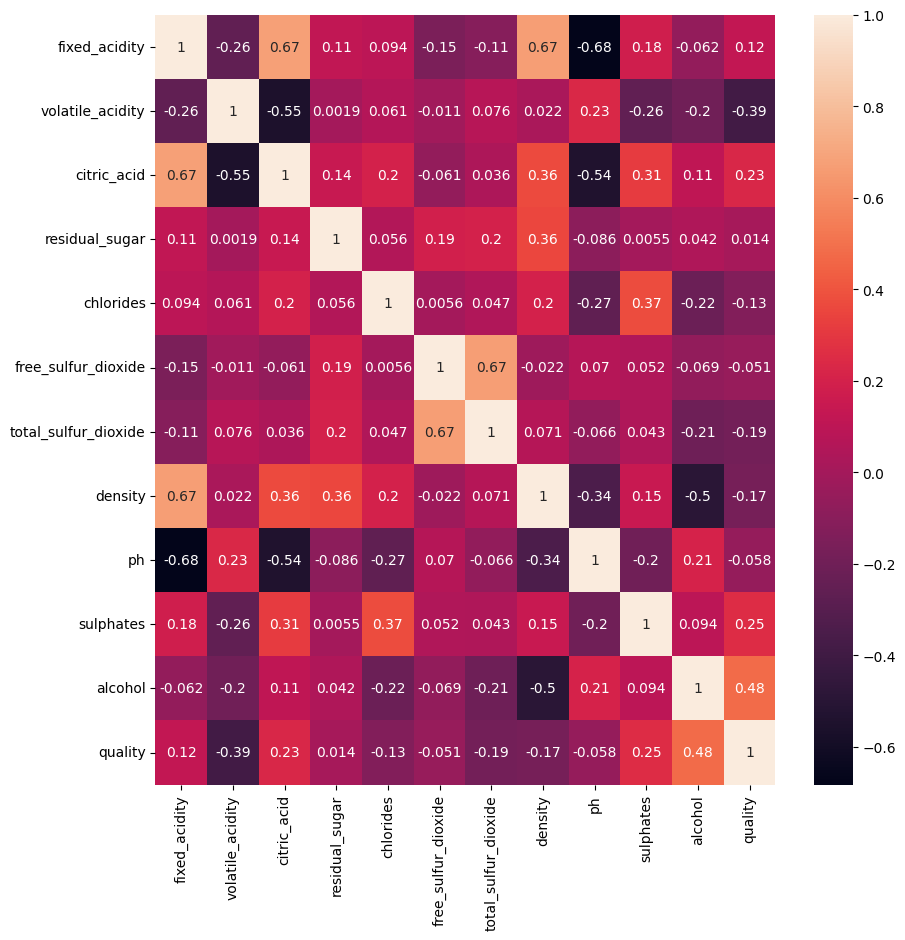

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(df1.corr(),annot=True)

Outliers

In [ ]:
fq1 = df1.fixed_acidity.quantile(0.25)
fq3 = df1.fixed_acidity.quantile(0.75)
fiqr = fq3 - fq1
f_upper_limit = fq3+(1.5)*(fiqr)
f_lower_limit = fq1-(1.5)*(fiqr)
print(fq1)
print(fq3)
print(fiqr)
print(f_upper_limit)
print(f_lower_limit)

7.1
9.2
2.0999999999999996
12.349999999999998
3.95


<Axes: >

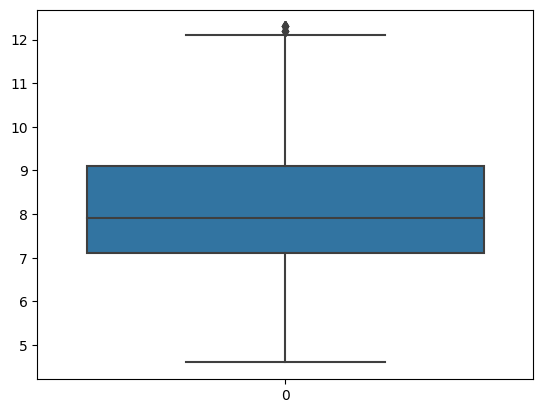

In [ ]:
df1=df1[(df1.fixed_acidity<f_upper_limit) & (df1.fixed_acidity>f_lower_limit)]
sb.boxplot(df1.fixed_acidity)

<Axes: >

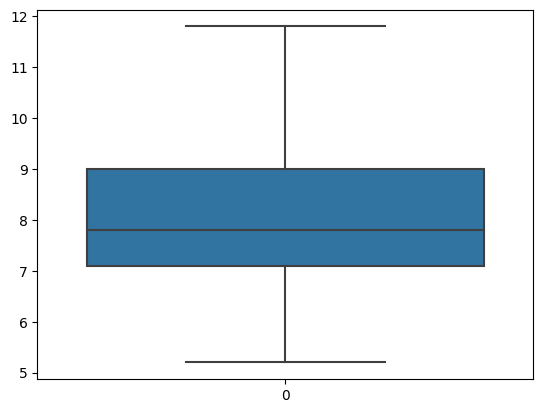

In [ ]:
fa_1=df1.fixed_acidity.quantile(0.01)
fa_2=df1.fixed_acidity.quantile(0.98)
df1=df1[(df1.fixed_acidity>=fa_1) & (df1.fixed_acidity<=fa_2)]
sb.boxplot(df1.fixed_acidity)

In [ ]:
vq1 = df1.volatile_acidity.quantile(0.25)
vq3 = df1.volatile_acidity.quantile(0.75)
viqr = vq3 - vq1
v_upper_limit = vq3+(1.5)*(viqr)
v_lower_limit = vq1-(1.5)*(viqr)
print(vq1)
print(vq3)
print(viqr)
print(v_upper_limit)
print(v_lower_limit)

0.4
0.64
0.24
1.0
0.040000000000000036


<Axes: >

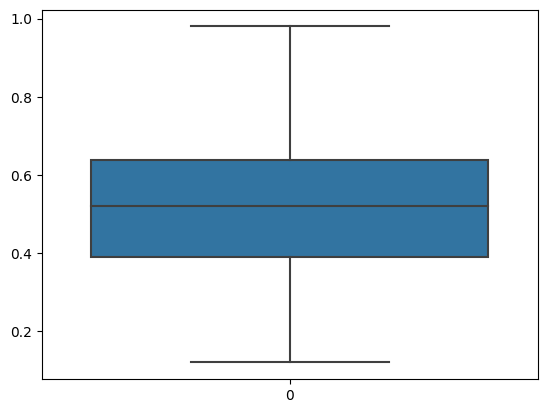

In [ ]:
df1=df1[(df1.volatile_acidity<v_upper_limit) & (df1.volatile_acidity>v_lower_limit)]
sb.boxplot(df1.volatile_acidity)

In [ ]:
cq1 = df1.citric_acid.quantile(0.25)
cq3 = df1.citric_acid.quantile(0.75)
ciqr = cq3 - cq1
c_upper_limit = cq3+(1.5)*(ciqr)
c_lower_limit = cq1-(1.5)*(ciqr)
print(cq1)
print(cq3)
print(ciqr)
print(c_upper_limit)
print(c_lower_limit)

0.09
0.4
0.31000000000000005
0.8650000000000001
-0.3750000000000001


<Axes: >

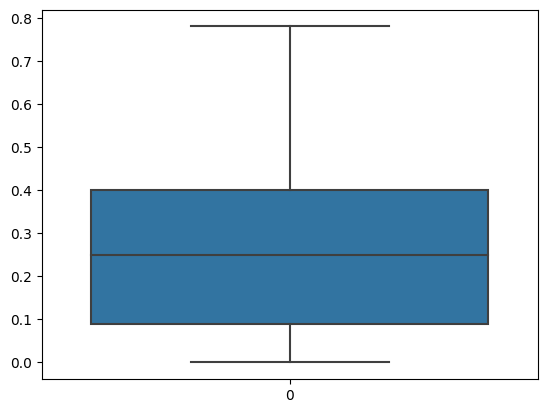

In [ ]:
df1=df1[(df1.citric_acid<c_upper_limit) & (df1.citric_acid>c_lower_limit)]
sb.boxplot(df1.citric_acid)

In [ ]:
rq1 = df1.residual_sugar.quantile(0.25)
rq3 = df1.residual_sugar.quantile(0.75)
riqr = rq3 - rq1
r_upper_limit = rq3+(1.5)*(riqr)
r_lower_limit = rq1-(1.5)*(riqr)
print(rq1)
print(rq3)
print(riqr)
print(r_upper_limit)
print(r_lower_limit)

1.9
2.6
0.7000000000000002
3.6500000000000004
0.8499999999999996


<Axes: >

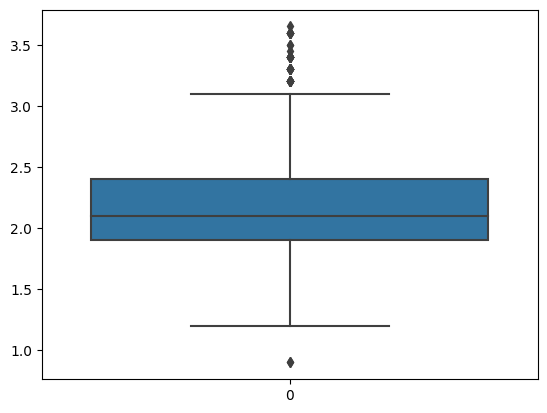

In [ ]:
df1=df1[(df1.residual_sugar<r_upper_limit) & (df1.residual_sugar>r_lower_limit)]
sb.boxplot(df1.residual_sugar)

<Axes: >

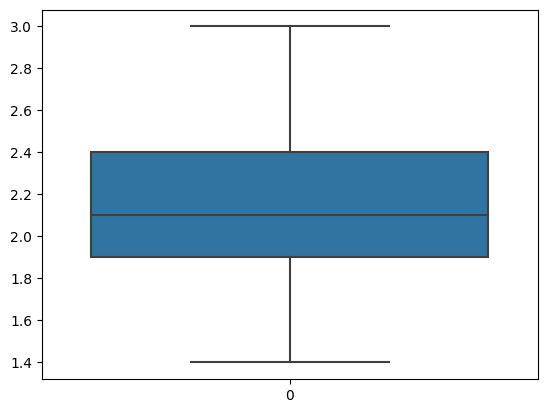

In [ ]:
rs_1=df1.residual_sugar.quantile(0.02)
rs_2=df1.residual_sugar.quantile(0.96)
df1=df1[(df1.residual_sugar>=rs_1) & (df1.residual_sugar<=rs_2)]
sb.boxplot(df1.residual_sugar)

In [ ]:
clq1 = df1.chlorides.quantile(0.25)
clq3 = df1.chlorides.quantile(0.75)
cliqr = clq3 - clq1
cl_upper_limit = clq3+(1.5)*(cliqr)
cl_lower_limit = clq1-(1.5)*(cliqr)
print(clq1)
print(clq3)
print(cliqr)
print(cl_upper_limit)
print(cl_lower_limit)

0.07
0.089
0.01899999999999999
0.11749999999999998
0.04150000000000002


<Axes: >

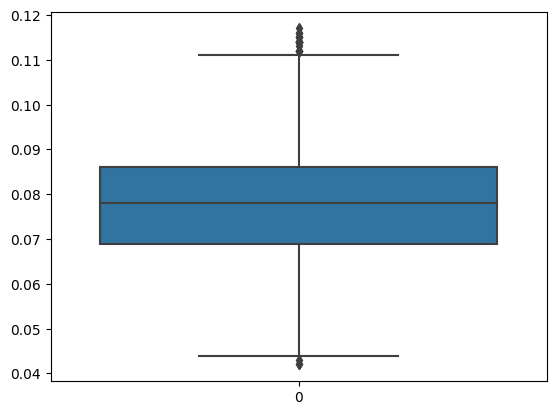

In [ ]:
df1=df1[(df1.chlorides<cl_upper_limit) & (df1.chlorides>cl_lower_limit)]
sb.boxplot(df1.chlorides)

<Axes: >

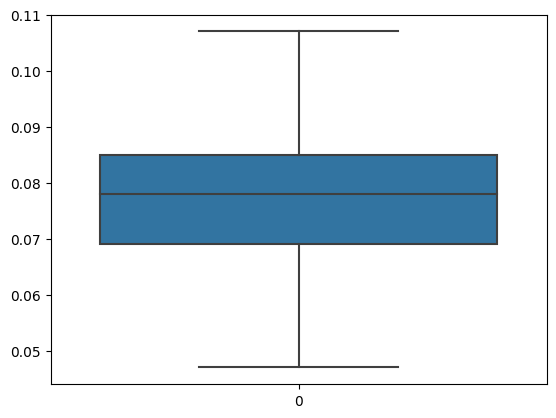

In [ ]:
cl_1=df1.chlorides.quantile(0.01)
cl_2=df1.chlorides.quantile(0.97)
df1=df1[(df1.chlorides>=cl_1) & (df1.chlorides<=cl_2)]
sb.boxplot(df1.chlorides)

In [ ]:
fs1 = df1.free_sulfur_dioxide.quantile(0.25)
fs3 = df1.free_sulfur_dioxide.quantile(0.75)
fsiqr = fs3 - fs1
fs_upper_limit = fs3+(1.5)*(fsiqr)
fs_lower_limit = fs1-(1.5)*(fsiqr)
print(fs1)
print(fs3)
print(fsiqr)
print(fs_upper_limit)
print(fs_lower_limit)

8.0
21.0
13.0
40.5
-11.5


<Axes: >

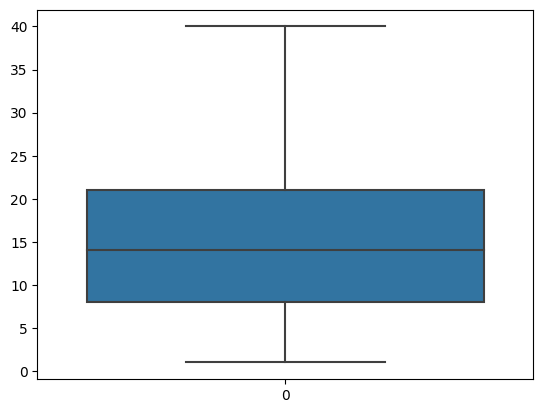

In [ ]:
df1=df1[(df1.free_sulfur_dioxide<fs_upper_limit) & (df1.free_sulfur_dioxide>fs_lower_limit)]
sb.boxplot(df1.free_sulfur_dioxide)

In [ ]:
ts1 = df1.total_sulfur_dioxide.quantile(0.25)
ts3 = df1.total_sulfur_dioxide.quantile(0.75)
tsiqr = ts3 - ts1
ts_upper_limit = ts3+(1.5)*(tsiqr)
ts_lower_limit = ts1-(1.5)*(tsiqr)
print(ts1)
print(ts3)
print(tsiqr)
print(ts_upper_limit)
print(ts_lower_limit)

23.0
58.0
35.0
110.5
-29.5


<Axes: >

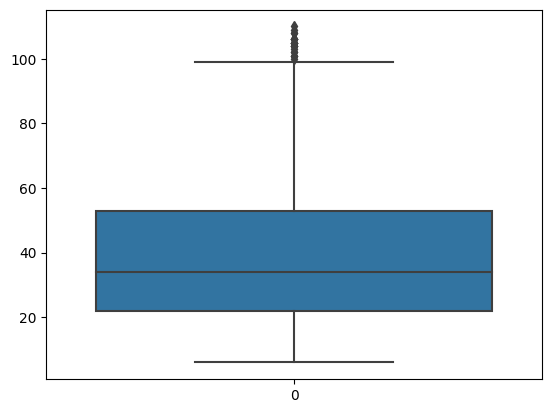

In [ ]:
df1=df1[(df1.total_sulfur_dioxide<ts_upper_limit) & (df1.total_sulfur_dioxide>ts_lower_limit)]
sb.boxplot(df1.total_sulfur_dioxide)

<Axes: >

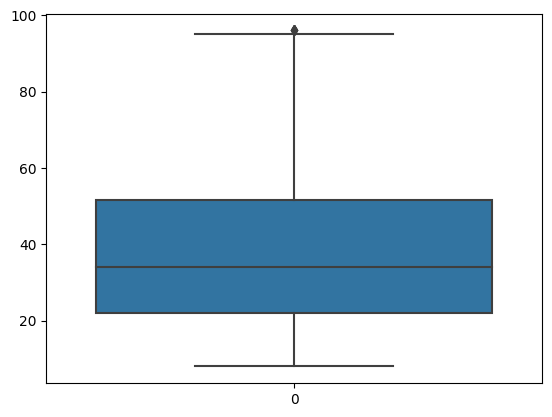

In [ ]:
ts_1=df1.total_sulfur_dioxide.quantile(0.01)
ts_2=df1.total_sulfur_dioxide.quantile(0.97)
df1=df1[(df1.total_sulfur_dioxide>=ts_1) & (df1.total_sulfur_dioxide<=ts_2)]
sb.boxplot(df1.total_sulfur_dioxide)

In [ ]:
d1 = df1.density.quantile(0.25)
d3 = df1.density.quantile(0.75)
diqr = d3 - d1
d_upper_limit = d3+(1.5)*(diqr)
d_lower_limit = d1-(1.5)*(diqr)
print(d1)
print(d3)
print(diqr)
print(d_upper_limit)
print(d_lower_limit)

0.99546
0.99744
0.0019799999999999818
1.00041
0.9924900000000001


<Axes: >

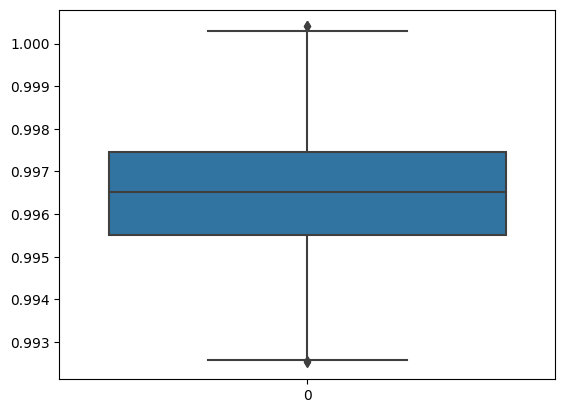

In [ ]:
df1=df1[(df1.density<d_upper_limit) & (df1.density>d_lower_limit)]
sb.boxplot(df1.density)

<Axes: >

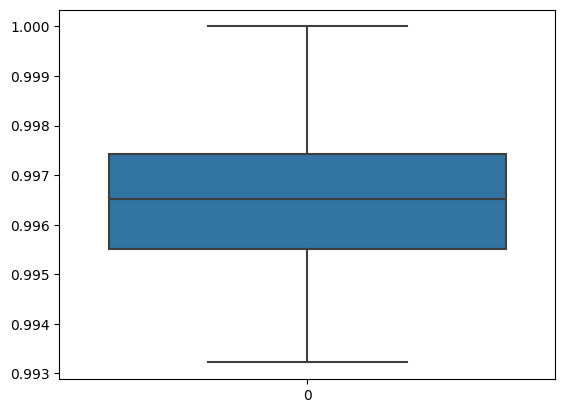

In [ ]:
d_1=df1.density.quantile(0.01)
d_2=df1.density.quantile(0.99)
df1=df1[(df1.density>=d_1) & (df1.density<=d_2)]
sb.boxplot(df1.density)

In [ ]:
ph1 = df1.ph.quantile(0.25)
ph3 = df1.ph.quantile(0.75)
phiqr = ph3 - ph1
ph_upper_limit = ph3+(1.5)*(phiqr)
ph_lower_limit = ph1-(1.5)*(phiqr)
print(ph1)
print(ph3)
print(phiqr)
print(ph_upper_limit)
print(ph_lower_limit)

3.24
3.41
0.16999999999999993
3.665
2.9850000000000003


<Axes: >

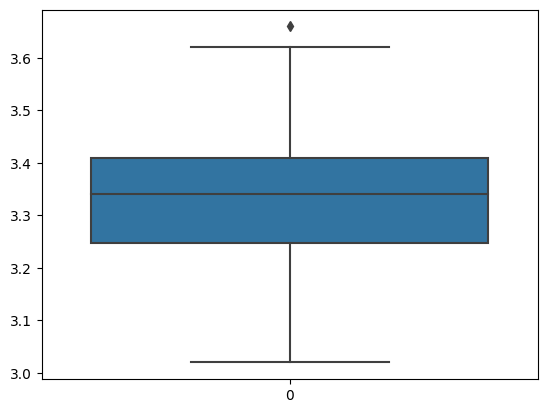

In [ ]:
df1=df1[(df1.ph<ph_upper_limit) & (df1.ph>ph_lower_limit)]
sb.boxplot(df1.ph)

<Axes: >

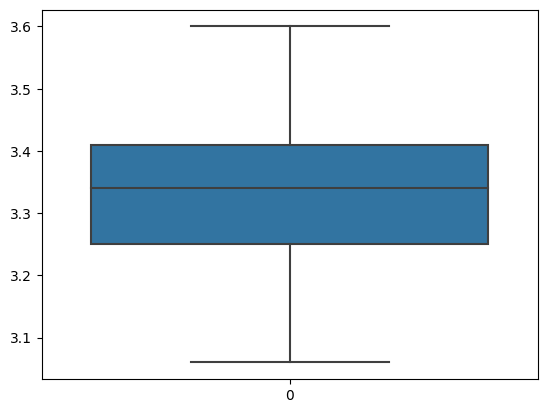

In [ ]:
ph_1=df1.ph.quantile(0.01)
ph_2=df1.ph.quantile(0.99)
df1=df1[(df1.ph>=ph_1) & (df1.ph<=ph_2)]
sb.boxplot(df1.ph)

In [ ]:
su1 = df1.sulphates.quantile(0.25)
su3 = df1.sulphates.quantile(0.75)
suiqr = su3 - su1
su_upper_limit = su3+(1.5)*(suiqr)
su_lower_limit = su1-(1.5)*(suiqr)
print(su1)
print(su3)
print(suiqr)
print(su_upper_limit)
print(su_lower_limit)

0.55
0.7
0.1499999999999999
0.9249999999999998
0.3250000000000002


<Axes: >

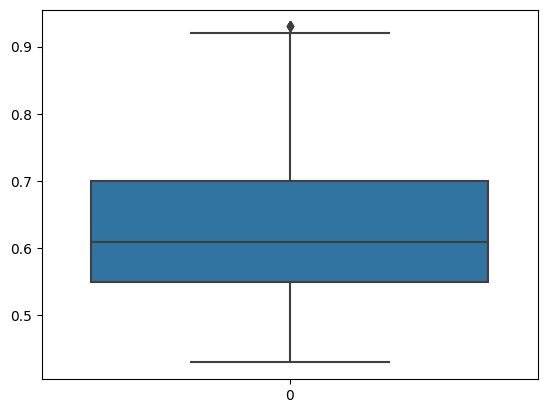

In [ ]:
su_1=df1.sulphates.quantile(0.01)
su_2=df1.sulphates.quantile(0.98)
df1=df1[(df1.sulphates>=su_1) & (df1.sulphates<=su_2)]
sb.boxplot(df1.sulphates)

In [ ]:
a1 = df1.alcohol.quantile(0.25)
a3 = df1.alcohol.quantile(0.75)
aiqr = a3 - a1
a_upper_limit = a3+(1.5)*(aiqr)
a_lower_limit = a1-(1.5)*(aiqr)
print(a1)
print(a3)
print(aiqr)
print(a_upper_limit)
print(a_lower_limit)

9.5
11.0
1.5
13.25
7.25


<Axes: >

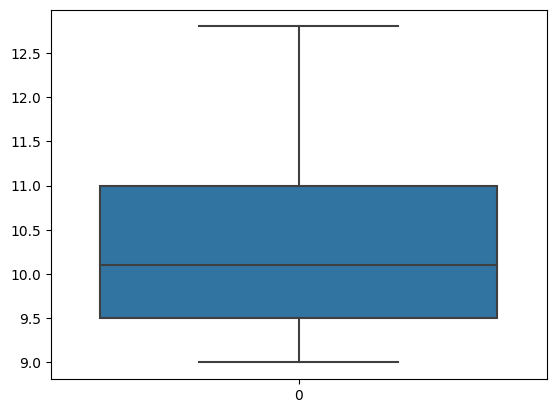

In [ ]:
a_1=df1.alcohol.quantile(0.01)
a_2=df1.alcohol.quantile(0.99)
df1=df1[(df1.alcohol>=a_1) & (df1.alcohol<=a_2)]
sb.boxplot(df1.alcohol)

Data preprocessing

In [ ]:
y = df1["quality"]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [ ]:
X = df1.drop(columns =["quality"],axis=1)
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Label Binarisation

In [ ]:
Y = df1['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1593    0
1594    0
1595    0
1596    0
1597    0
Name: quality, Length: 932, dtype: int64


Random Forest Classifier

In [ ]:
X_train,X_test,y_train,y_test=tts(X, y, test_size = 0.2, random_state = 3)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
y_train_pred = rfc.predict(X_train)

In [ ]:
print('Testing accuracy: ', accuracy_score(y_test,y_pred))
print('Training accuracy: ', accuracy_score(y_train,y_train_pred))

Testing accuracy:  0.7272727272727273
Training accuracy:  1.0


In [ ]:
da1 = X_train[:1]
print(rfc.predict(da1))

[5]


In [ ]:
print(y_train[:1])

602    5
Name: quality, dtype: int64


Decision tree classifier

In [ ]:
X_train,X_test,y_train,y_test=tts(X, y, test_size = 0.2, random_state = 3)

In [ ]:
dtc = DecisionTreeClassifier(max_depth=2,splitter='best',criterion='entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
y_train_pred = dtc.predict(X_train)

In [ ]:
print('Testing accuracy: ', accuracy_score(y_test,y_pred))
print('Training accuracy: ', accuracy_score(y_train,y_train_pred))

Testing accuracy:  0.5294117647058824
Training accuracy:  0.5597315436241611


In [ ]:
da2 = X_train[:1]
print(dtc.predict(da2))

[5]


In [ ]:
y_train[:1]

602    5
Name: quality, dtype: int64

KNN Classifier

In [ ]:
X_train,X_test,y_train,y_test=tts(X, y, test_size = 0.2, random_state = 3)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_train_pred = knn.predict(X_train)

In [ ]:
print('Testing accuracy: ', accuracy_score(y_test,y_pred))
print('Training accuracy: ', accuracy_score(y_train,y_train_pred))

Testing accuracy:  0.48128342245989303
Training accuracy:  0.6308724832214765


In [ ]:
da2 = X_train[:1]
print(dtc.predict(da2))

[5]


In [ ]:
y_train[:1]

602    5
Name: quality, dtype: int64

Random observation

In [65]:
dinput1 = [7.9, 1.0, 0, 3.0, 0.08, 30, 100, 0.9562, 3.1, 0.74, 11.5]
pred1 = dtc.predict([dinput1])
pred1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([6])

In [66]:
dinput2 = [7.9, 1.0, 0, 3.0, 0.08, 30, 100, 0.9562, 3.1, 0.74, 11.5]
pred2 = rfc.predict([dinput2])
pred2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([6])

In [67]:
dinput3 = [7.9, 1.0, 0, 3.0, 0.08, 30, 100, 0.9562, 3.1, 0.74, 11.5]
pred3 = knn.predict([dinput3])
pred3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([6])